In [204]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ETFunctions
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.dates as mdates
import GraphHelpers as GH
import astral
Location = astral.Location(('Lincoln', 'New Zealand', -43.62, 172.466, 'Pacific/Auckland', 16))

In [3]:
root = 'C:\GitHubRepos\CropWaterAnalysis'

In [4]:
WheatWaterDelta = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\ProfileWaterDelta.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
FodderBeetWaterDelta = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\ProfileWaterDelta.pkl')],axis=1,keys=['FodderBeet'],names =['Crop'])
OatsWaterDelta = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\ProfileWaterDelta.pkl')],axis=1,keys=['Oats'],names =['Crop'])
BarleyWaterDelta = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\ProfileWaterDelta.pkl')],axis=1,keys=['Barley'],names =['Crop'])
BarleyWaterDelta.columns = BarleyWaterDelta.columns.swaplevel('Irrigation','Cultivar')
WaterDelta = pd.concat([WheatWaterDelta,FodderBeetWaterDelta,OatsWaterDelta,BarleyWaterDelta],axis=1)
WaterDelta.dropna(how='all',inplace=True)
GH.SortFrame(WaterDelta)

In [5]:
WheatSWD = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames\DailySWD.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
FodderBeetSWD = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames\DailySWD.pkl')],axis=1,keys=['FodderBeet'],names =['Crop'])
OatsSWD = pd.concat([pd.read_pickle(root+'\Oats\DataFrames\DailySWD.pkl')],axis=1,keys=['Oats'],names =['Crop'])
BarleySWD = pd.concat([pd.read_pickle(root+'\Barley\DataFrames\DailySWD.pkl')],axis=1,keys=['Barley'],names =['Crop'])
BarleySWD.columns = BarleySWD.columns.swaplevel('Irrigation','Cultivar')
SWD = pd.concat([WheatSWD,FodderBeetSWD,OatsSWD,BarleySWD],axis=1)
SWD.dropna(how='all',inplace=True)
GH.SortFrame(WaterDelta)

In [6]:
WheatDarkPET = pd.concat([pd.read_pickle(root+'\Wheat\DataFrames/NightTimePET.pkl')],axis=1,keys=['Wheat'],names =['Crop'])
FodderBeetDarkPET = pd.concat([pd.read_pickle(root+'\FodderBeet\DataFrames/NightTimePET.pkl')],axis=1,keys=['FodderBeet'],names =['Crop'])
OatsDarkPET = pd.concat([pd.read_pickle(root+'\Oats\DataFrames/NightTimePET.pkl')],axis=1,keys=['Oats'],names =['Crop'])
BarleyDarkPET = pd.concat([pd.read_pickle(root+'\Barley\DataFrames/NightTimePET.pkl')],axis=1,keys=['Barley'],names =['Crop'])
DarkPET = pd.concat([WheatDarkPET,FodderBeetDarkPET,OatsDarkPET,BarleyDarkPET],axis=1)
DarkPET.dropna(how='all',inplace=True)
GH.SortFrame(WaterDelta)
DarkPET.index=DarkPET.index.normalize()

In [7]:
WaterDelta.Barley.columns

MultiIndex(levels=[['Dash', 'Dryland', 'Excess', 'Irrigated', 'Normal', 'Omaka'], ['0', '125', '250', '300', '320', '50', '80', 'High', 'Low', 'Mid'], ['1', '2', '3', '4']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], [7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9], [0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3]],
           names=['Irrigation', 'Nitrogen', 'Block'])

In [8]:
Crops = WaterDelta.columns.get_level_values(0).drop_duplicates().values
Crops.sort()
WheatGPs = GH.SetGraphicsPatterns(WaterDelta.Wheat.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

FodderBeetGPs = GH.SetGraphicsPatterns(WaterDelta.FodderBeet.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['orange','green','purple'])

OatsGPs = GH.SetGraphicsPatterns(WaterDelta.Oats.columns,
                    ['-','--'],
                    [0.15,0.45],
                    ['o','^'],
                    ['purple','green','orange'])
BarleyGPs = GH.SetGraphicsPatterns(WaterDelta.Barley.columns,
                    ['--','-'],
                    [0.45,0.15],
                    ['^','o'],
                    ['blue','red','green'])

Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '250', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '250', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'orange', 0.45, '^'), ('--', 'green', 0.45, '^'), ('--', 'purple', 0.45, '^')]
StyleFrame
              Lin     Col   Alp Mar     MFC
Dryland   0     -  orange  0.15   o  orange
          250   -   green  0.15   o   green
          50    -  purple  0.15   o  purple
Irrigated 0    --  orange  0.45   ^   white
          250  --   green  0.45   ^   white
          50   --  purple  0.45   ^   white
Irrigation
['Dryland', 'Irrigated']
Nitrogen
['0', '300', '50']
Treatments
MultiIndex(levels=[['Dryland', 'Irrigated'], ['0', '300', '50']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])
Styles
[('-', 'orange', 0.15, 'o'), ('-', 'green', 0.15, 'o'), ('-', 'purple', 0.15, 'o'), ('--', 'ora

In [248]:
def MakeTimeSeriesGraphs(Data,name,ymin,ymax,legloc):
    Graph = plt.figure(figsize=(18,30))
    Crops = Data.columns.get_level_values(0).drop_duplicates().values
    Crops.sort()
    pos = 1
    for C in Crops:
        GP = globals()[C+'GPs']
        F1 = Data.loc[:,C].columns.get_level_values(0).name
        F2 = Data.loc[:,C].columns.get_level_values(1).name
        ax = Graph.add_subplot(3,2,pos)
        GH.AddIndexedPlot(Data.loc[:,C].where(Data.loc[:,C]!=0,np.nan).dropna(how='all').groupby(level=[F1,F2],axis=1).mean(),ax,GP,2)
        plt.ylabel(name, fontsize=36);
        plt.ylim(ymin,ymax)
        plt.tick_params(labelsize=20)
        plt.title(C, fontsize=28)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
        GH.AddLegend(legloc,16,'')
        pos+=1

def MakeSingleCropTimeSeries(Data,Crop):
    graph = plt.figure(figsize=(18,10))
    F1 = Data.loc[:,Crop].columns.get_level_values(0).name
    F2 = Data.loc[:,Crop].columns.get_level_values(1).name
    ax = graph.add_subplot(1,1,1)
    GP = globals()[Crop+'GPs']
    PlotData = Data.loc[:,Crop].where(Data.loc[:,Crop]!=0,np.nan).dropna(how='all').groupby(level=[F1,F2],axis=1).mean().resample('h').sum()
    GH.AddIndexedPlot(PlotData,ax,GP,2)
    plt.ylim(-1.5,0.5)
    for D in PlotData.resample('d').sum().index:
        SR = Location.dawn(D).replace(tzinfo=None) #+ datetime.timedelta(1) #- datetime.timedelta(hours=13)
        SS = Location.dusk(D).replace(tzinfo=None) - datetime.timedelta(1)# - datetime.timedelta(hours=13)
        ax.axvspan(SS,SR,alpha=0.1,color='k')
    plt.plot([PlotData.index.min(),PlotData.index.max()],[0,0],color='k')

In [ ]:
df['ColA (Localized datetime)'].apply(lambda x: x.replace(tzinfo=None))

## Look at the 15min data

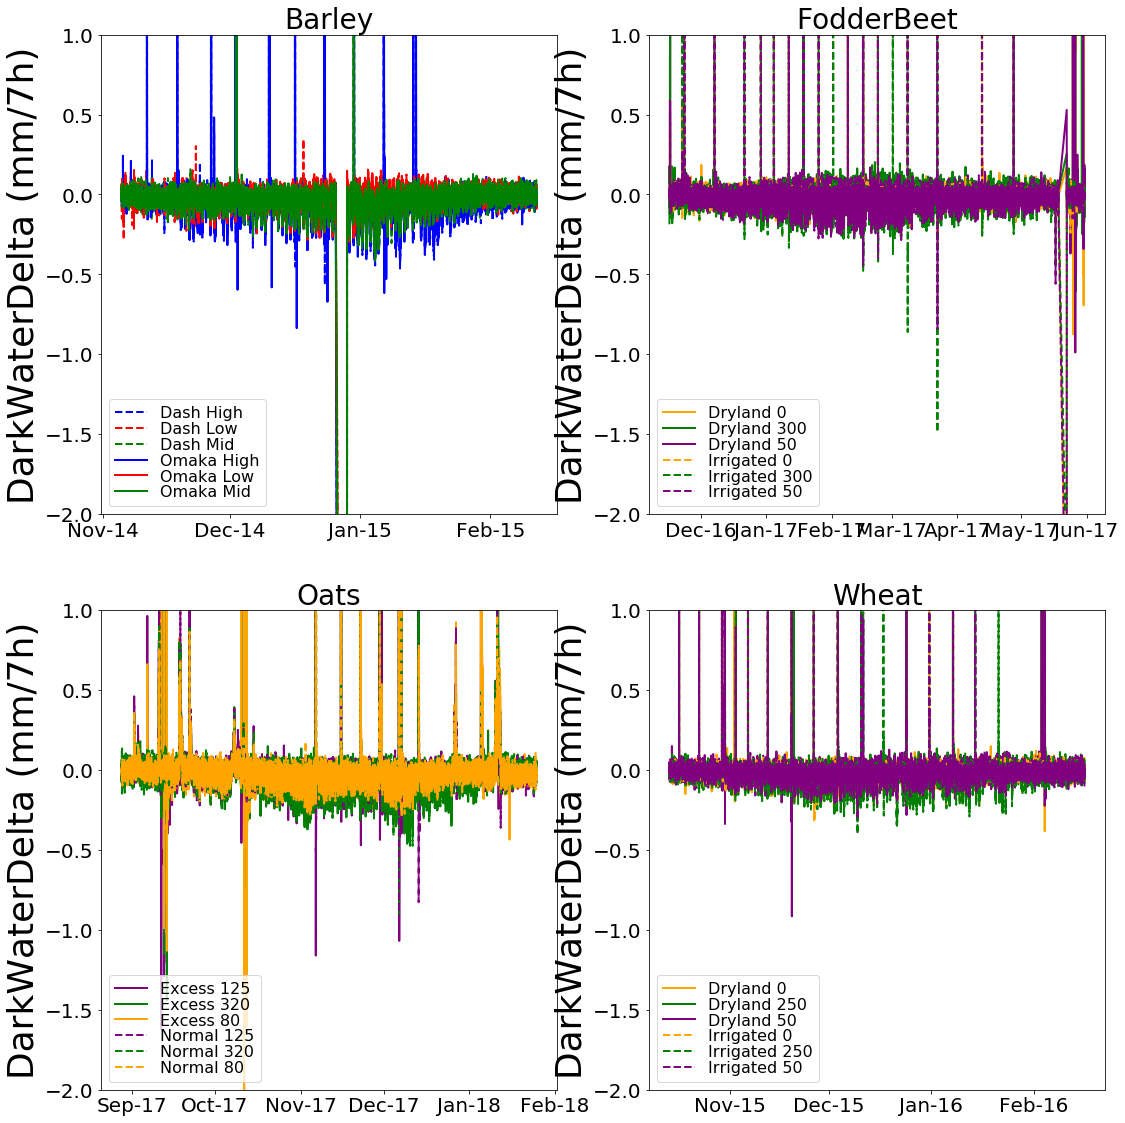

In [10]:
MakeTimeSeriesGraphs(WaterDelta,'DarkWaterDelta (mm/7h)',-2,1,3)

## Large positives are when irrigation or rainfall applied.  Can remove these as they are short periods

In [11]:
WaterDeltaDirty = WaterDelta.copy()
WaterDelta.where(WaterDelta<0.1,np.nan,inplace=True)

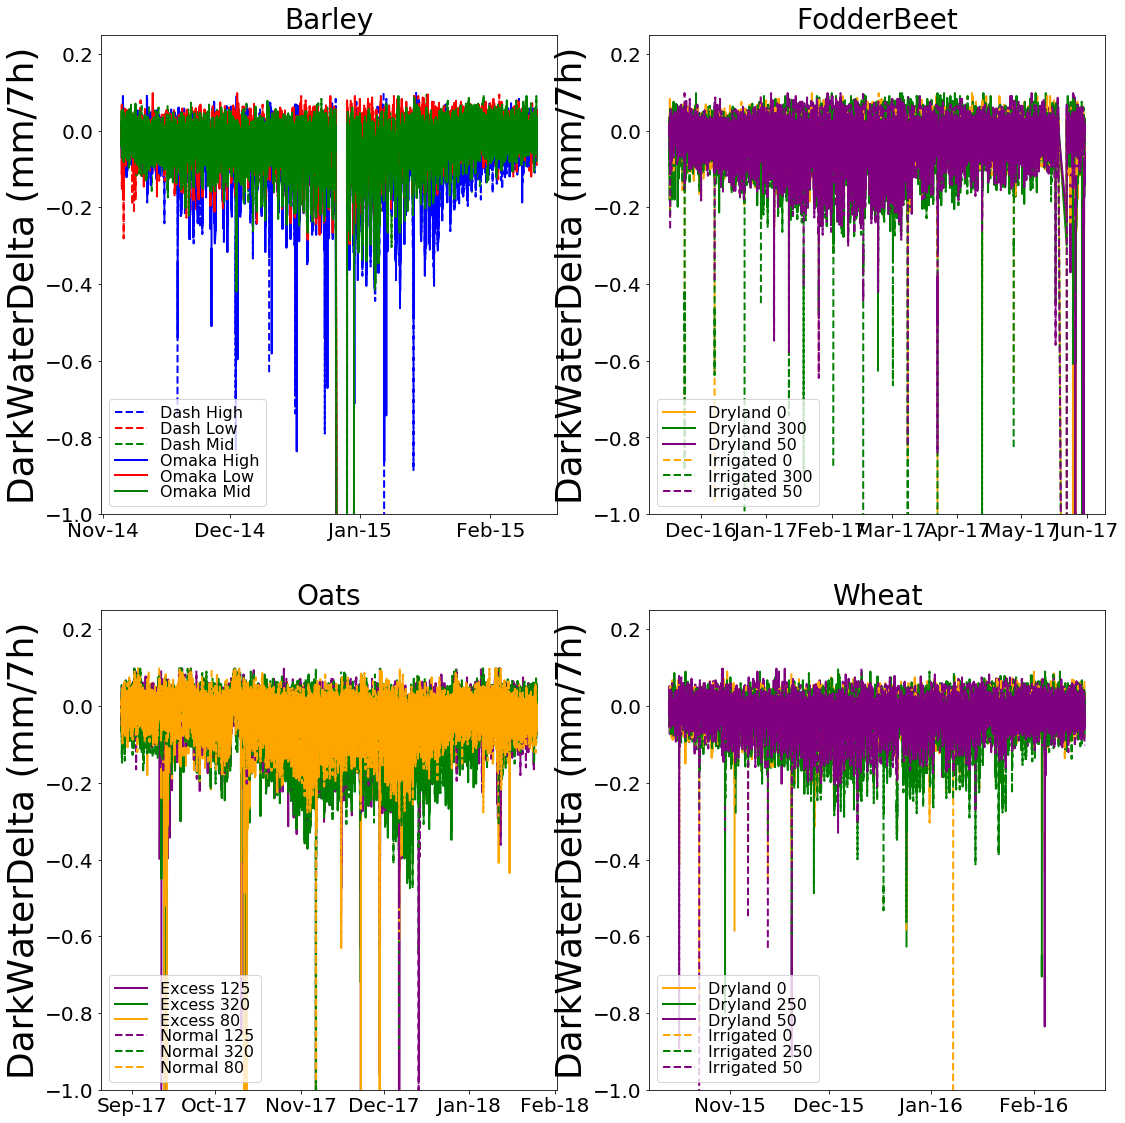

In [12]:
MakeTimeSeriesGraphs(WaterDelta,'DarkWaterDelta (mm/7h)',-1,0.25,3)

## Work out how to sample parts of daily data from different times

In [13]:
Test = WaterDelta.loc['2014-12-3':'2014-12-5',('Barley','Dash','High','1')]

In [14]:
Test

2014-12-03 00:00:00    0.0225
2014-12-03 00:15:00    0.0150
2014-12-03 00:30:00    0.0600
2014-12-03 00:45:00   -0.0300
2014-12-03 01:00:00   -0.0600
2014-12-03 01:15:00    0.0975
2014-12-03 01:30:00    0.0525
2014-12-03 01:45:00    0.0900
2014-12-03 02:00:00    0.0450
2014-12-03 02:15:00   -0.0825
2014-12-03 02:30:00   -0.0075
2014-12-03 02:45:00    0.0375
2014-12-03 03:00:00   -0.0300
2014-12-03 03:15:00    0.0675
2014-12-03 03:30:00   -0.0450
2014-12-03 03:45:00   -0.0225
2014-12-03 04:00:00    0.0150
2014-12-03 04:15:00    0.0150
2014-12-03 04:30:00   -0.0225
2014-12-03 04:45:00    0.0600
2014-12-03 05:00:00   -0.0075
2014-12-03 05:15:00   -0.0225
2014-12-03 05:30:00    0.0225
2014-12-03 05:45:00   -0.0450
2014-12-03 06:00:00    0.0750
2014-12-03 06:15:00   -0.0600
2014-12-03 06:30:00    0.0750
2014-12-03 06:45:00    0.0075
2014-12-03 07:00:00   -0.0225
2014-12-03 07:15:00   -0.0150
                        ...  
2014-12-05 16:30:00   -0.1275
2014-12-05 16:45:00   -0.0075
2014-12-05

In [15]:
Test.iloc[Test.index.indexer_between_time(datetime.time(22),datetime.time(5))]

2014-12-03 00:00:00    0.0225
2014-12-03 00:15:00    0.0150
2014-12-03 00:30:00    0.0600
2014-12-03 00:45:00   -0.0300
2014-12-03 01:00:00   -0.0600
2014-12-03 01:15:00    0.0975
2014-12-03 01:30:00    0.0525
2014-12-03 01:45:00    0.0900
2014-12-03 02:00:00    0.0450
2014-12-03 02:15:00   -0.0825
2014-12-03 02:30:00   -0.0075
2014-12-03 02:45:00    0.0375
2014-12-03 03:00:00   -0.0300
2014-12-03 03:15:00    0.0675
2014-12-03 03:30:00   -0.0450
2014-12-03 03:45:00   -0.0225
2014-12-03 04:00:00    0.0150
2014-12-03 04:15:00    0.0150
2014-12-03 04:30:00   -0.0225
2014-12-03 04:45:00    0.0600
2014-12-03 05:00:00   -0.0075
2014-12-03 22:00:00   -0.0150
2014-12-03 22:15:00   -0.0225
2014-12-03 22:30:00    0.0300
2014-12-03 22:45:00   -0.0675
2014-12-03 23:00:00   -0.0450
2014-12-03 23:15:00       NaN
2014-12-03 23:30:00   -0.0525
2014-12-03 23:45:00   -0.0300
2014-12-04 00:00:00    0.0000
                        ...  
2014-12-04 23:45:00   -0.0075
2014-12-05 00:00:00   -0.0075
2014-12-05

(datetime.time(23),datetime.time(5)) samples from ll pm till 5am including a value on each boundary time

In [16]:
Test.iloc[Test.index.indexer_between_time(datetime.time(5),datetime.time(22))]

2014-12-03 05:00:00   -0.0075
2014-12-03 05:15:00   -0.0225
2014-12-03 05:30:00    0.0225
2014-12-03 05:45:00   -0.0450
2014-12-03 06:00:00    0.0750
2014-12-03 06:15:00   -0.0600
2014-12-03 06:30:00    0.0750
2014-12-03 06:45:00    0.0075
2014-12-03 07:00:00   -0.0225
2014-12-03 07:15:00   -0.0150
2014-12-03 07:30:00   -0.0150
2014-12-03 07:45:00    0.0075
2014-12-03 08:00:00   -0.0525
2014-12-03 08:15:00   -0.1275
2014-12-03 08:30:00    0.0225
2014-12-03 08:45:00   -0.0450
2014-12-03 09:00:00   -0.0675
2014-12-03 09:15:00   -0.0975
2014-12-03 09:30:00   -0.0375
2014-12-03 09:45:00   -0.1425
2014-12-03 10:00:00   -0.0450
2014-12-03 10:15:00   -0.0975
2014-12-03 10:30:00   -0.0975
2014-12-03 10:45:00   -0.2025
2014-12-03 11:00:00   -0.2250
2014-12-03 11:15:00   -0.0825
2014-12-03 11:30:00   -0.1500
2014-12-03 11:45:00   -0.0600
2014-12-03 12:00:00   -0.1800
2014-12-03 12:15:00   -0.1425
                        ...  
2014-12-05 14:45:00   -0.2100
2014-12-05 15:00:00   -0.1050
2014-12-05

(datetime.time(5),datetime.time(23)) samples from 5am till llpm including a value on each boundary time.  

In [17]:
Test.iloc[Test.index.indexer_between_time(datetime.time(5),datetime.time(22))].loc['2014-12-4'].sum()

-3.352500000000191

The sum from 5am till 11pm on the 4-Dec is -3.293

In [18]:
Test.iloc[Test.index.indexer_between_time(datetime.time(5),datetime.time(22))].resample('24H', base=6).sum()

2014-12-02 06:00:00   -0.0525
2014-12-03 06:00:00   -4.3200
2014-12-04 06:00:00   -3.3525
2014-12-05 06:00:00   -3.4575
Freq: 24H, Name: (Barley, Dash, High, 1), dtype: float64

.resample('24H', base=6) sums the values from 6am today to 6am tomorrow and puts them beside todays date.  This works for the 5am until llpm sample giving the correct value for 4-Dec (-3.292)

Now let work out how it works when we sum from 11pm till 5am, having data from two days

In [19]:
Test.iloc[Test.index.indexer_between_time(datetime.time(22),datetime.time(5))].loc['2014-12-3 22:00':'2014-12-4 6:00']

2014-12-03 22:00:00   -0.0150
2014-12-03 22:15:00   -0.0225
2014-12-03 22:30:00    0.0300
2014-12-03 22:45:00   -0.0675
2014-12-03 23:00:00   -0.0450
2014-12-03 23:15:00       NaN
2014-12-03 23:30:00   -0.0525
2014-12-03 23:45:00   -0.0300
2014-12-04 00:00:00    0.0000
2014-12-04 00:15:00   -0.0150
2014-12-04 00:30:00   -0.0900
2014-12-04 00:45:00   -0.0375
2014-12-04 01:00:00   -0.0675
2014-12-04 01:15:00   -0.0225
2014-12-04 01:30:00   -0.0300
2014-12-04 01:45:00    0.0150
2014-12-04 02:00:00   -0.0900
2014-12-04 02:15:00       NaN
2014-12-04 02:30:00    0.0225
2014-12-04 02:45:00    0.0525
2014-12-04 03:00:00   -0.1875
2014-12-04 03:15:00    0.0900
2014-12-04 03:30:00   -0.1425
2014-12-04 03:45:00    0.0900
2014-12-04 04:00:00   -0.1050
2014-12-04 04:15:00   -0.0375
2014-12-04 04:30:00   -0.0525
2014-12-04 04:45:00   -0.0450
2014-12-04 05:00:00    0.0150
Name: (Barley, Dash, High, 1), dtype: float64

In [20]:
Test.iloc[Test.index.indexer_between_time(datetime.time(22),datetime.time(5))].loc['2014-12-3 22:00':'2014-12-4 6:00'].sum()

-0.8400000000000318

The sum from llam 3-Dec to 5am 4-Dec is -0.51

In [21]:
Test.iloc[Test.index.indexer_between_time(datetime.time(22),datetime.time(5))].resample('24H', base=6).sum()

2014-12-02 06:00:00    0.2700
2014-12-03 06:00:00   -0.8400
2014-12-04 06:00:00   -0.4575
2014-12-05 06:00:00   -0.1350
Freq: 24H, Name: (Barley, Dash, High, 1), dtype: float64

using .resample('24H', base=6).sum() reports -0.51 on the 3rd of Dec which is the date tht the 6am base occured on.  However the bulk of the water use summed in this period was on the morning of the 4th of Dec.
This is OK but we must remember that the dark water deltas summed from 11pm until 5am using the above method are for the dark period at the end of the reporting date, not at the start.

In [253]:
def dayLight(dt):
    SR = Location.dawn(dt).replace(tzinfo=None)
    SS = Location.dusk(dt).replace(tzinfo=None)
    if (dt >= SR) & (dt <= SS):
        return True
    else:
        return False

DayLight = []
Dark = []
for dt in WaterDelta.index:
    dl = dayLight(dt)
    DayLight.append(dl)
    Dark.append( not dl)

In [254]:
DarkWaterDeltas = WaterDelta.loc[Dark]
DarkWaterDeltas = DarkWaterDeltas.resample('24H', base=6).sum()#Base of 5 means sampling from 6am to 6am
DarkWaterDeltas.index = DarkWaterDeltas.index.normalize()

In [255]:
LightWaterDeltas = WaterDelta.loc[DayLight]
LightWaterDeltas = LightWaterDeltas.resample('24H', base=6).sum()#Base of 5 means sampling from 6am to 6am
LightWaterDeltas.index = LightWaterDeltas.index.normalize()

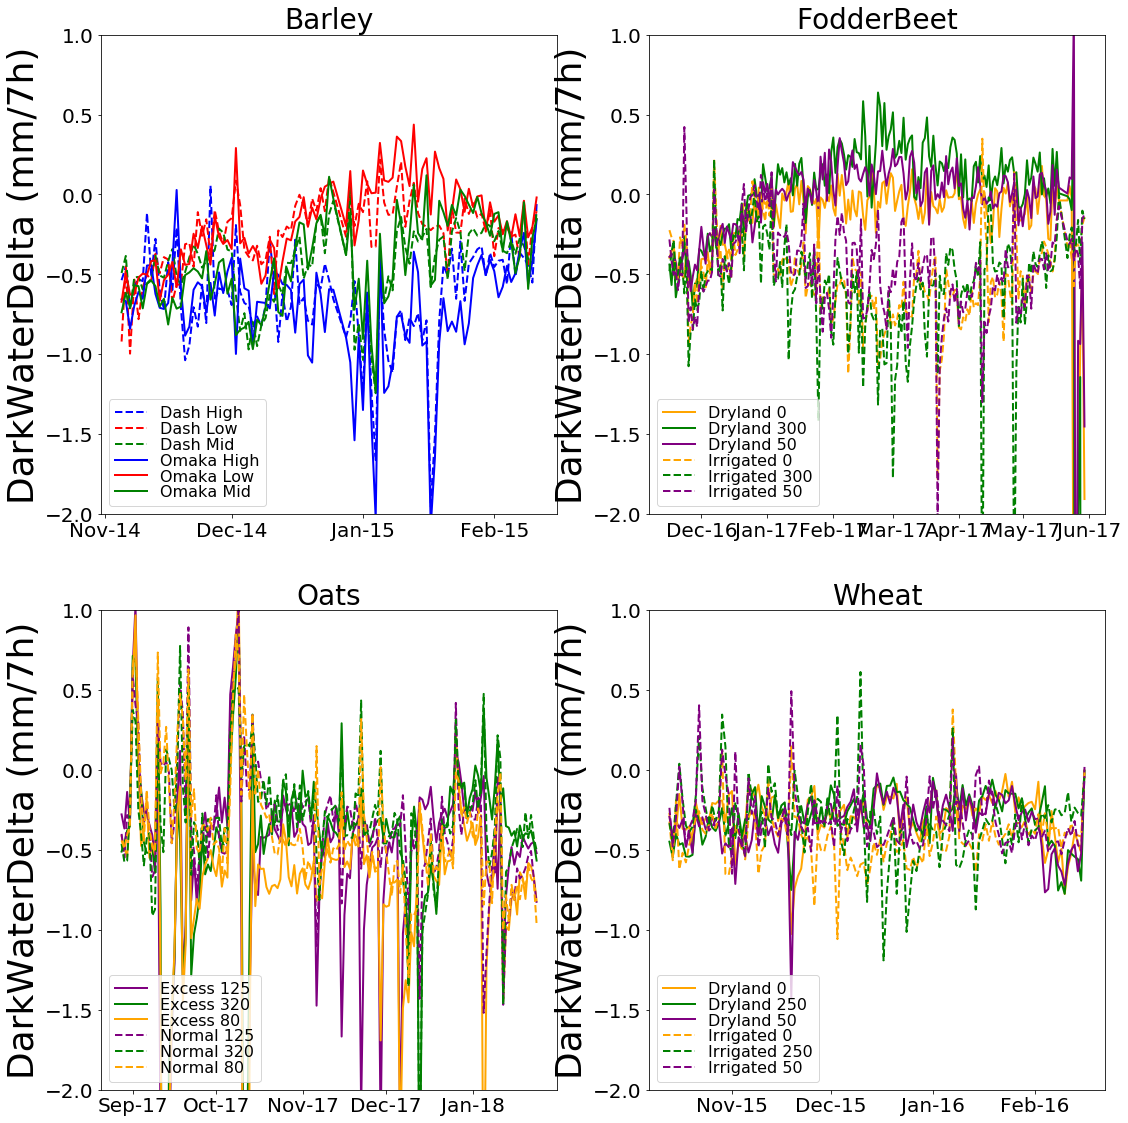

In [256]:
MakeTimeSeriesGraphs(DarkWaterDeltas,'DarkWaterDelta (mm/7h)',-2,1,3)

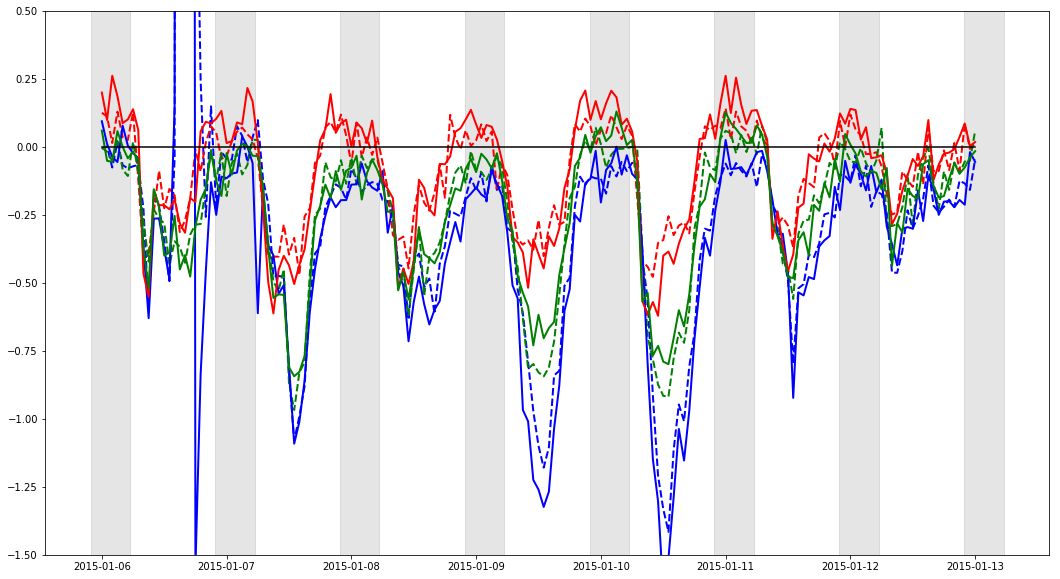

In [249]:
start = '2015-1-6'
start =  datetime.datetime.strptime(start,"%Y-%m-%d")
end = start + datetime.timedelta(weeks=1)
MakeSingleCropTimeSeries(WaterDeltaDirty.loc[start:end,:],'Barley')

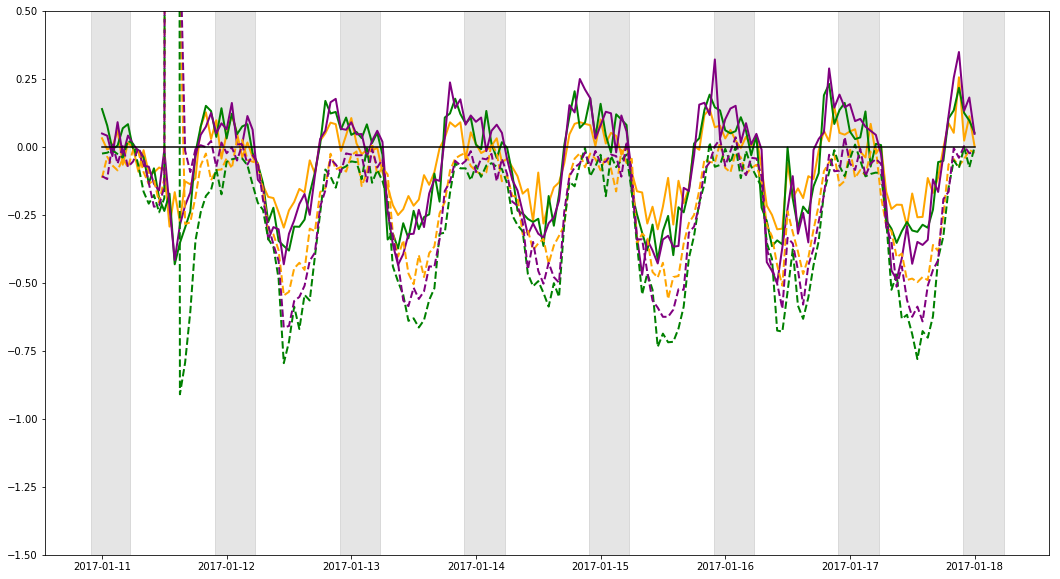

In [269]:
start = '2017-1-11'
start =  datetime.datetime.strptime(start,"%Y-%m-%d")
end = start + datetime.timedelta(weeks=1)
MakeSingleCropTimeSeries(WaterDeltaDirty.loc[start:end,:],'FodderBeet')

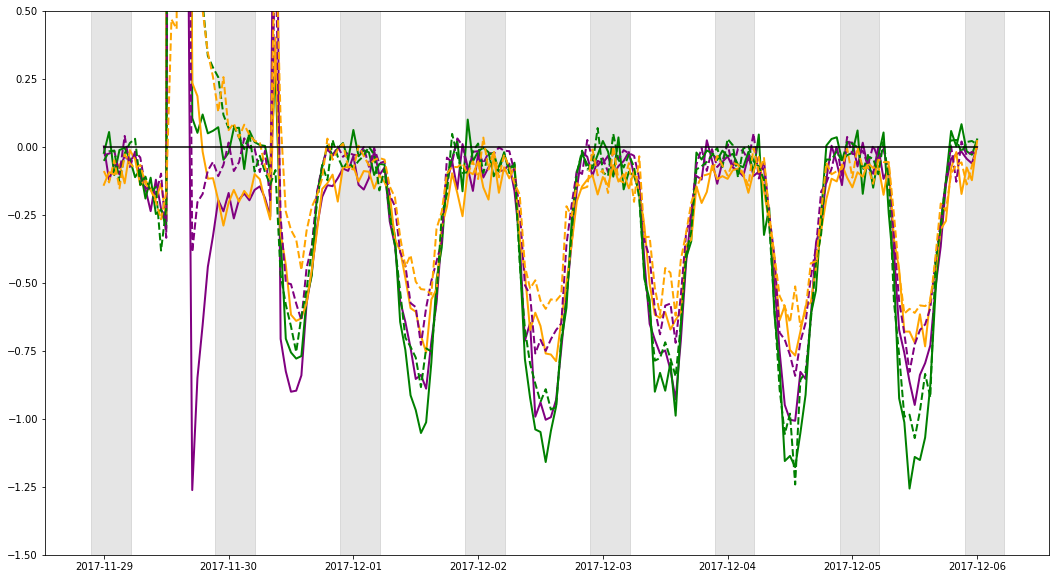

In [251]:
start = '2017-11-29'
start =  datetime.datetime.strptime(start,"%Y-%m-%d")
end = start + datetime.timedelta(weeks=1)
MakeSingleCropTimeSeries(WaterDeltaDirty.loc[start:end,:],'Oats')

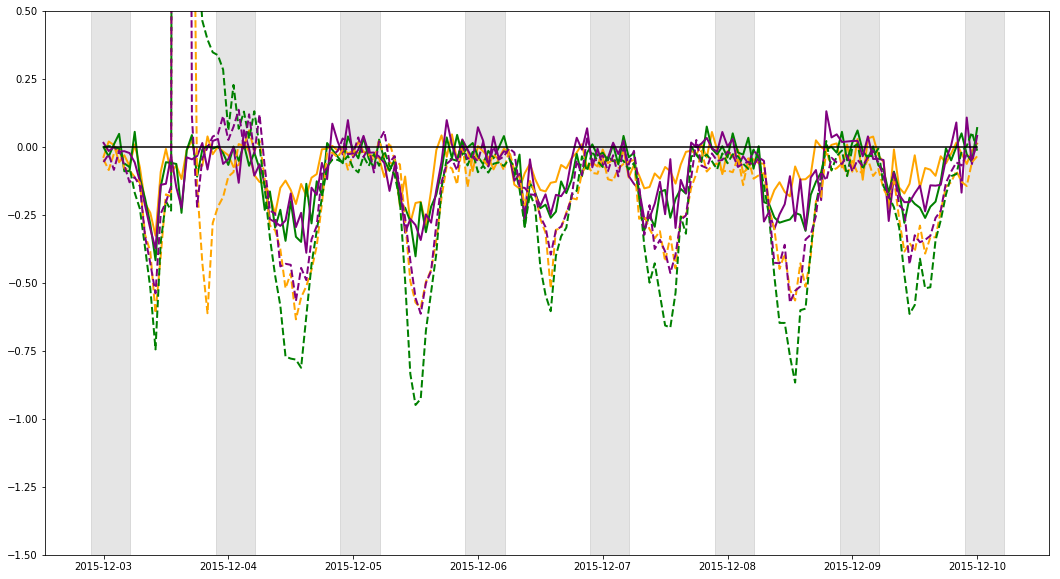

In [252]:
start = '2015-12-3'
start =  datetime.datetime.strptime(start,"%Y-%m-%d")
end = start + datetime.timedelta(weeks=1)
MakeSingleCropTimeSeries(WaterDeltaDirty.loc[start:end,:],'Wheat')

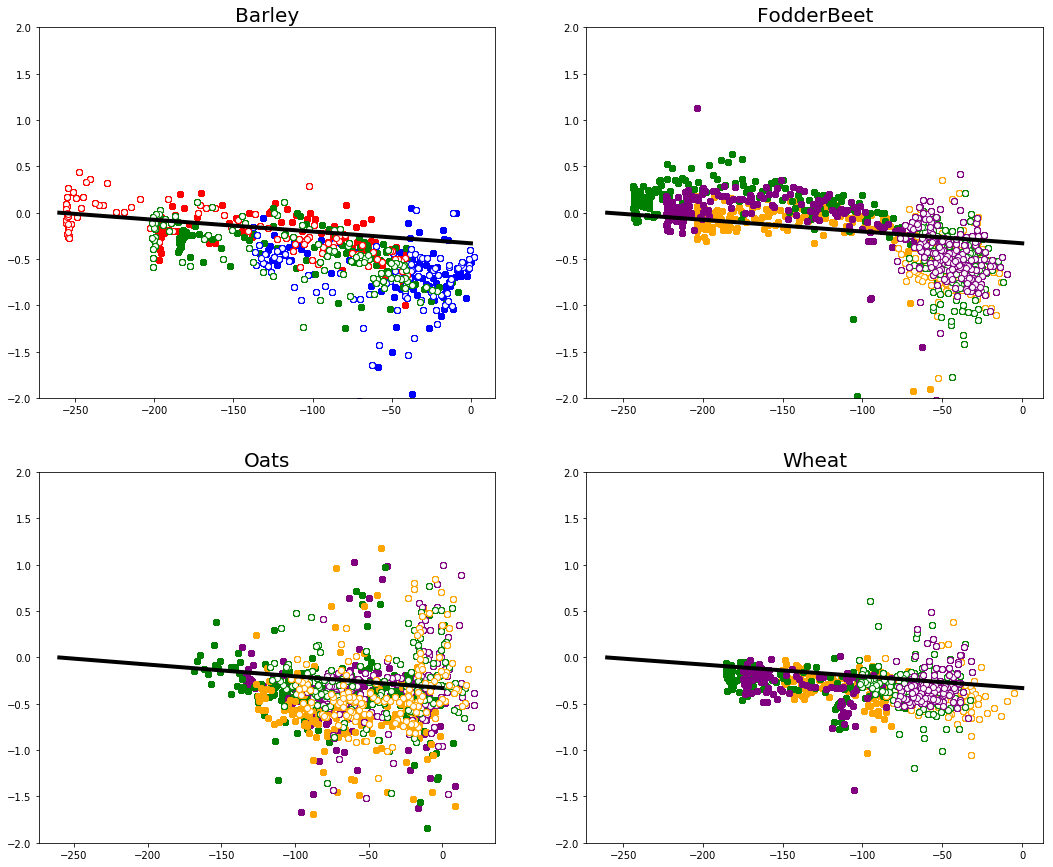

In [257]:
Graph = plt.figure(figsize=(18,15))
pos=1
for C in Crops:
    ax = Graph.add_subplot(2,2,pos)
    GP = globals()[C+'GPs']
    CropSWD = SWD.loc[:,C].stack().stack()
    F1 = DarkWaterDeltas.loc[:,C].columns.get_level_values(0).name
    F1s = DarkWaterDeltas.loc[:,C].columns.get_level_values(0)
    F2 = DarkWaterDeltas.loc[:,C].columns.get_level_values(1).name
    F2s = DarkWaterDeltas.loc[:,C].columns.get_level_values(1)
    CropDarkWaterDeltas = DarkWaterDeltas.loc[:,C].groupby(level=[F1,F2],axis=1).mean().stack().stack()
    CropDarkWaterDeltas = CropDarkWaterDeltas.reindex(CropSWD.index)
    for f1 in F1s:
        for f2 in F2s:
            plt.plot(CropSWD.loc[(slice(None),f2,f1)],CropDarkWaterDeltas.loc[(slice(None),f2,f1)],
                     'o',mec = GP.StyleFrame.loc[(f1,f2),'Col'],
                     mfc = GP.StyleFrame.loc[(f1,f2),'MFC'],label=C)
    plt.ylim(-2,2)
    plt.title(C,fontsize=20)
    pos += 1
    plt.plot([-260,.12],[.0,-.33],'-',color='k',lw=4)


## It appears some of the dark soil water deltas we are seeing are caused by water deficit.  This makes sense.  If field capacity is when drainage has reduced to 1mm per day then we would expect 0.25 mm dark flux (its a 6 hour period) with a SWD of 0.  As the soil dries drainage slows, reaches 0 with a SWD of 160 and then becoming positive as the soil get drier than this.
## Apparent soil water deficit effect on dark water fluxes can be quanified as flux = -0.3 - SWD * 0.00153 
## Overlain on this is upward flux caused by crop water extraction and surface evaporation and downward flux caused by irrigation

# Calculate estimated dark flux from SWD relationship and residuals

In [32]:
def SWD_flux(SWD):
    return -0.33 - SWD*0.00173

In [33]:
EstDflux = SWD.copy()
for col in EstDflux:
    EstDflux.loc[:,col] = [SWD_flux(EstDflux.loc[x,col]) for x in EstDflux.loc[:,col].index]

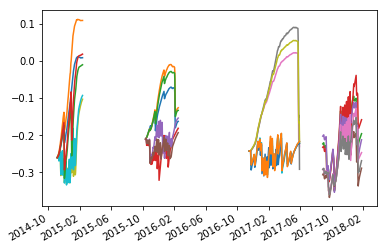

In [34]:
EstDflux.plot(legend=False)

In [35]:
MeanDarkWaterDeltas = DarkWaterDeltas.groupby(level=['Crop','Irrigation','Nitrogen'],axis=1).mean()
Residules = MeanDarkWaterDeltas - EstDflux

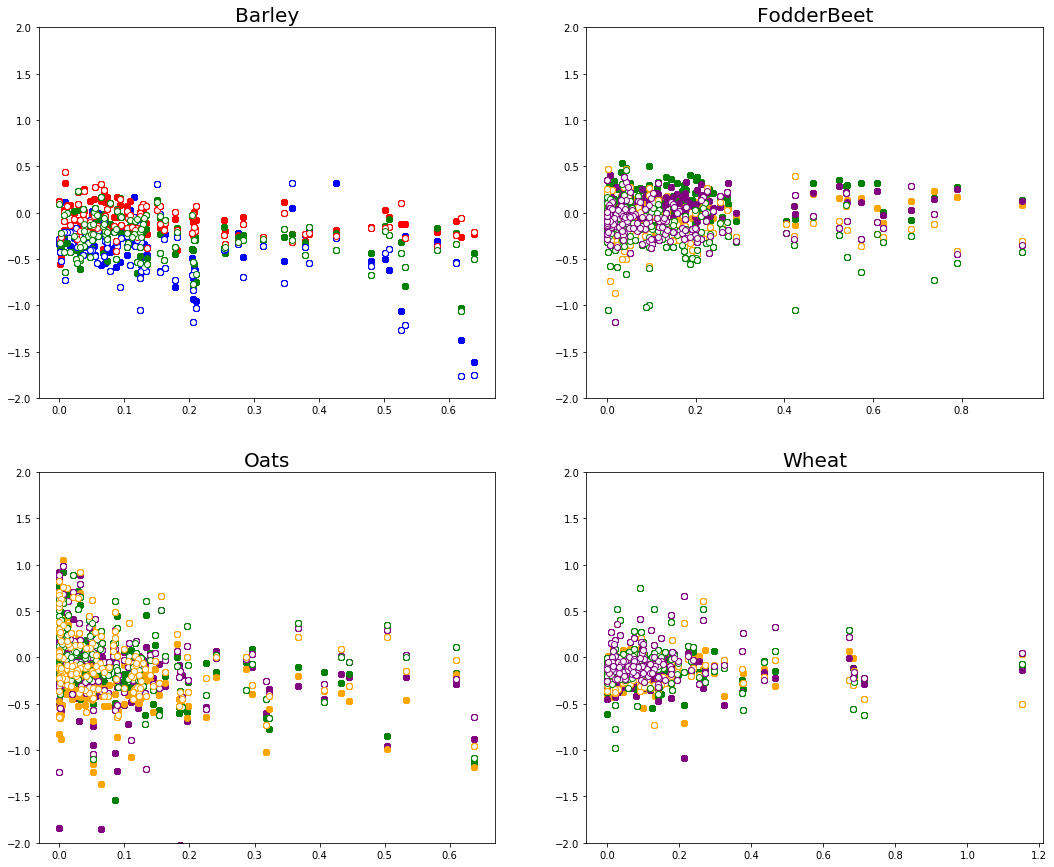

In [36]:
Graph = plt.figure(figsize=(18,15))
pos=1
for C in Crops:
    ax = Graph.add_subplot(2,2,pos)
    GP = globals()[C+'GPs']
    CropDPET = DarkPET.loc[:,C]
    F1 = Residules.loc[:,C].columns.get_level_values(0).name
    F1s = Residules.loc[:,C].columns.get_level_values(0)
    F2 = Residules.loc[:,C].columns.get_level_values(1).name
    F2s = Residules.loc[:,C].columns.get_level_values(1)
    CropResidules = Residules.loc[:,C].groupby(level=[F1,F2],axis=1).mean().stack().stack()
    for f1 in F1s:
        for f2 in F2s:
            plt.plot(CropDPET,
                     CropResidules.loc[(slice(None),f2,f1)].reindex(CropDPET.index),
                     'o',mec = GP.StyleFrame.loc[(f1,f2),'Col'],
                     mfc = GP.StyleFrame.loc[(f1,f2),'MFC'],label=C)
    plt.ylim(-2,2)
    plt.title(C,fontsize=20)
    pos += 1
    #ax.plot([-260,30],[.2,-.4],'-','k',lw=4)


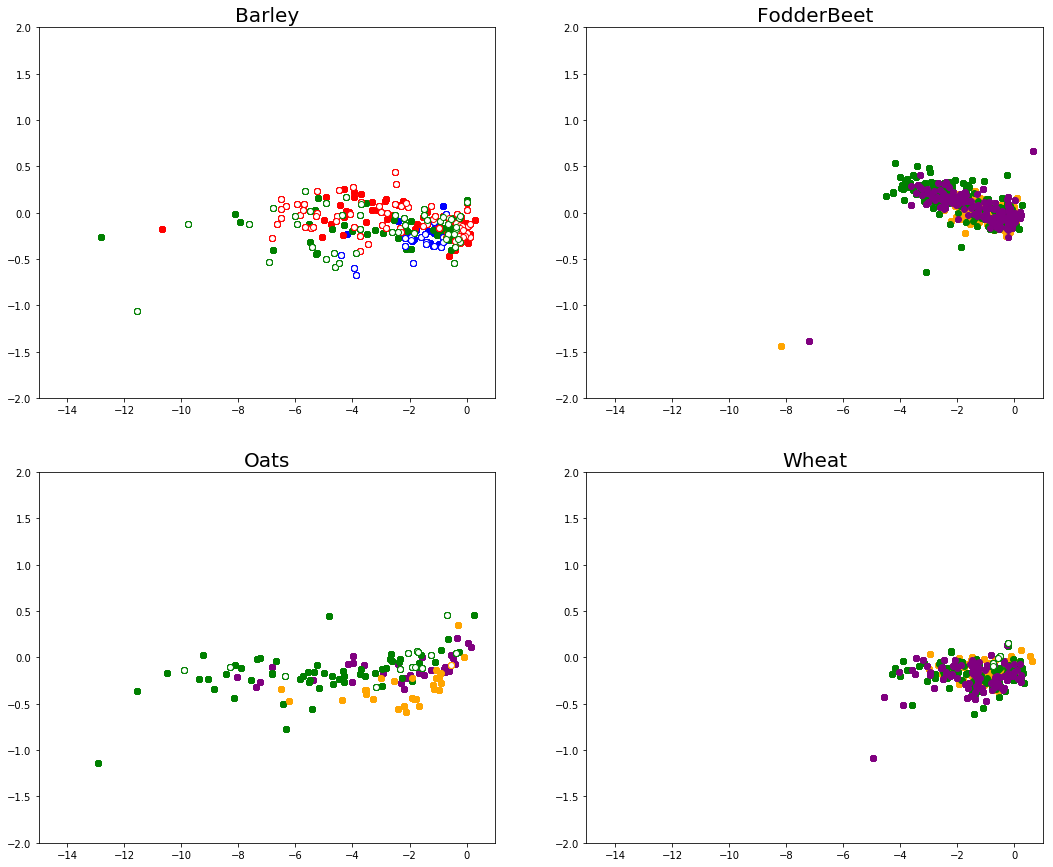

In [37]:
Graph = plt.figure(figsize=(18,15))
pos=1
for C in Crops:
    ax = Graph.add_subplot(2,2,pos)
    GP = globals()[C+'GPs']
    F1 = Residules.loc[:,C].columns.get_level_values(0).name
    F1s = Residules.loc[:,C].columns.get_level_values(0)
    F2 = Residules.loc[:,C].columns.get_level_values(1).name
    F2s = Residules.loc[:,C].columns.get_level_values(1)
    CropResidules = Residules.loc[:,C].groupby(level=[F1,F2],axis=1).mean().stack().stack()
    CropET = LightWaterDeltas.loc[:,C].groupby(level=[F1,F2],axis=1).mean().stack().stack()
    CropET.where(SWD.loc[:,C].stack().stack()<-100,np.nan,inplace=True)
    CropResidules = CropResidules.reindex(CropET.index)
    
    for f1 in F1s:
        for f2 in F2s:
            plt.plot(CropET.loc[(slice(None),f2,f1)],CropResidules.loc[(slice(None),f2,f1)],
                     'o',mec = GP.StyleFrame.loc[(f1,f2),'Col'],
                     mfc = GP.StyleFrame.loc[(f1,f2),'MFC'],label=C)
    plt.ylim(-2,2)
    plt.xlim(-15,1)
    plt.title(C,fontsize=20)
    pos += 1
    #ax.plot([-260,30],[.3,-.5],'-','k',lw=4)


In [38]:
MaxInflux = WaterDeltaDirty.iloc[WaterDeltaDirty.index.indexer_between_time(datetime.time(5),datetime.time(22))]
MaxInflux = MaxInflux.resample('24H', base=6).max()#Base of 5 means sampling from 6am to 6am
MaxInflux.index = MaxInflux.index.normalize()
DSI = MaxInflux.copy()
DSI.where(MaxInflux>2,np.nan,inplace=True)
DSI.where(MaxInflux<=2,0.0,inplace=True)
for col in DSI.columns:
    for date in DSI.loc[:,col].iloc[1:].index:
        if DSI.loc[date,col] != 0.0:
            yesterday = date - datetime.timedelta(1)
            DSI.loc[date,col] = DSI.loc[yesterday,col] + 1

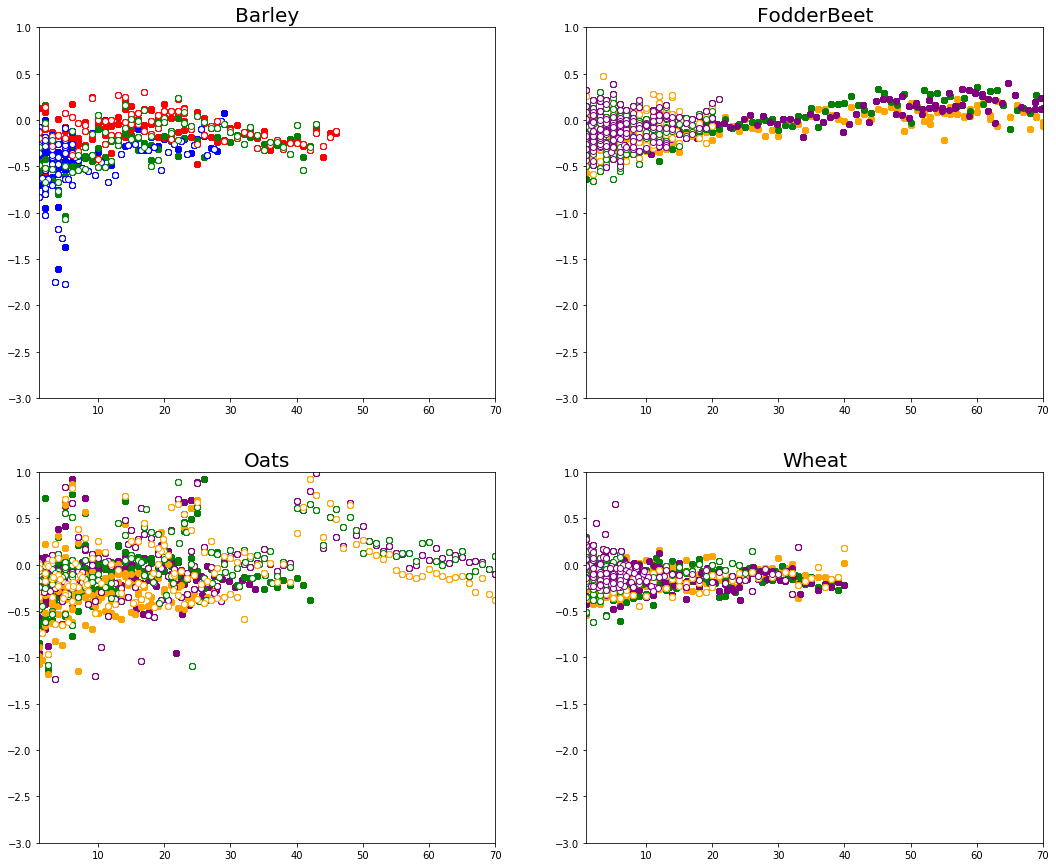

In [39]:
Graph = plt.figure(figsize=(18,15))
pos=1
for C in Crops:
    ax = Graph.add_subplot(2,2,pos)
    GP = globals()[C+'GPs']
    F1 = Residules.loc[:,C].columns.get_level_values(0).name
    F1s = Residules.loc[:,C].columns.get_level_values(0)
    F2 = Residules.loc[:,C].columns.get_level_values(1).name
    F2s = Residules.loc[:,C].columns.get_level_values(1)
    CropResidules = Residules.loc[:,C].groupby(level=[F1,F2],axis=1).mean().stack().stack()
    CropResidules.where(CropResidules!=0.0,np.nan,inplace=True)
    CropDSI = DSI.loc[:,C].groupby(level=[F1,F2],axis=1).mean().stack().stack()
    CropResidules = CropResidules.reindex(CropDSI.index)
    for f1 in F1s:
        for f2 in F2s:
            plt.plot(CropDSI.loc[(slice(None),f2,f1)],CropResidules.loc[(slice(None),f2,f1)],
                     'o',mec = GP.StyleFrame.loc[(f1,f2),'Col'],
                     mfc = GP.StyleFrame.loc[(f1,f2),'MFC'],label=C)
    plt.ylim(-3,1)
    plt.xlim(1,70)
    plt.title(C,fontsize=20)
    pos += 1

In [258]:
DailyWaterDelta = WaterDelta.resample('d').sum()

In [259]:
DailyWaterDelta.where(DailyWaterDelta<1,np.nan,inplace=True)

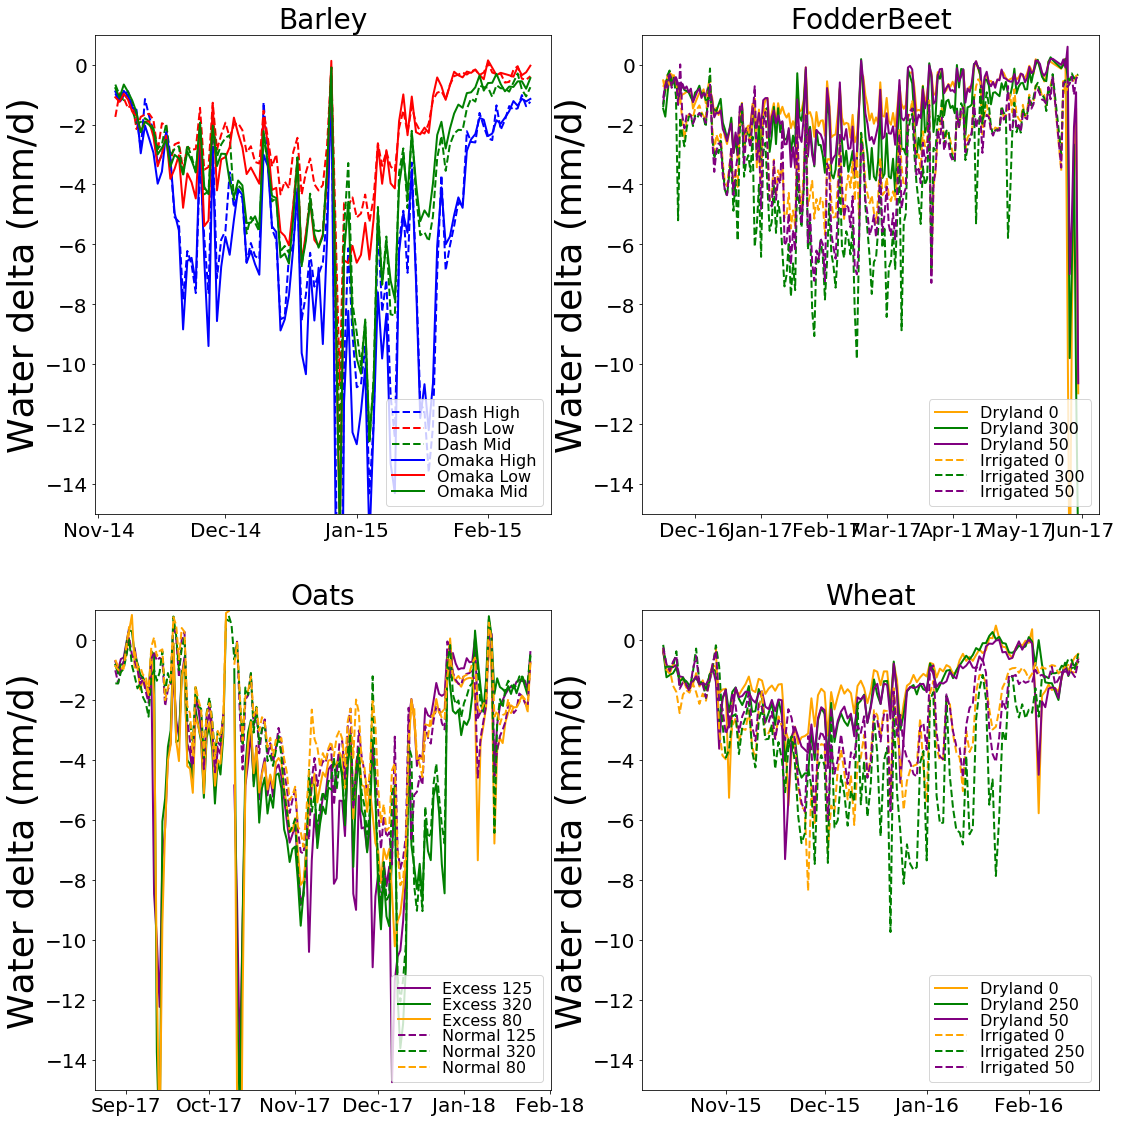

In [260]:
MakeTimeSeriesGraphs(DailyWaterDelta,'Water delta (mm/d)',-15,1,4)

In [261]:
FluxAdjustment = DarkWaterDeltas.copy()
def DailyFluxAdjustment(DarkFlux):
    if DarkFlux<=0:  # Assume dark water flux is driange and multiply by 4 to give daily value
        return DarkFlux * 1.3 
    else:           # Assume dark water flux is capillary rise and multiply by 1.3
        if DarkFlux>-1.0: #unsaturated drainage at night when there is no suction from crop
            return DarkFlux * 3
        else:  ## saturated drainage, assuming happening all day
            return DarkFlux * 4.0
for col in FluxAdjustment.columns:
    FluxAdjustment.loc[:,col] = [DailyFluxAdjustment(FluxAdjustment.loc[x,col]) for x in FluxAdjustment.index]

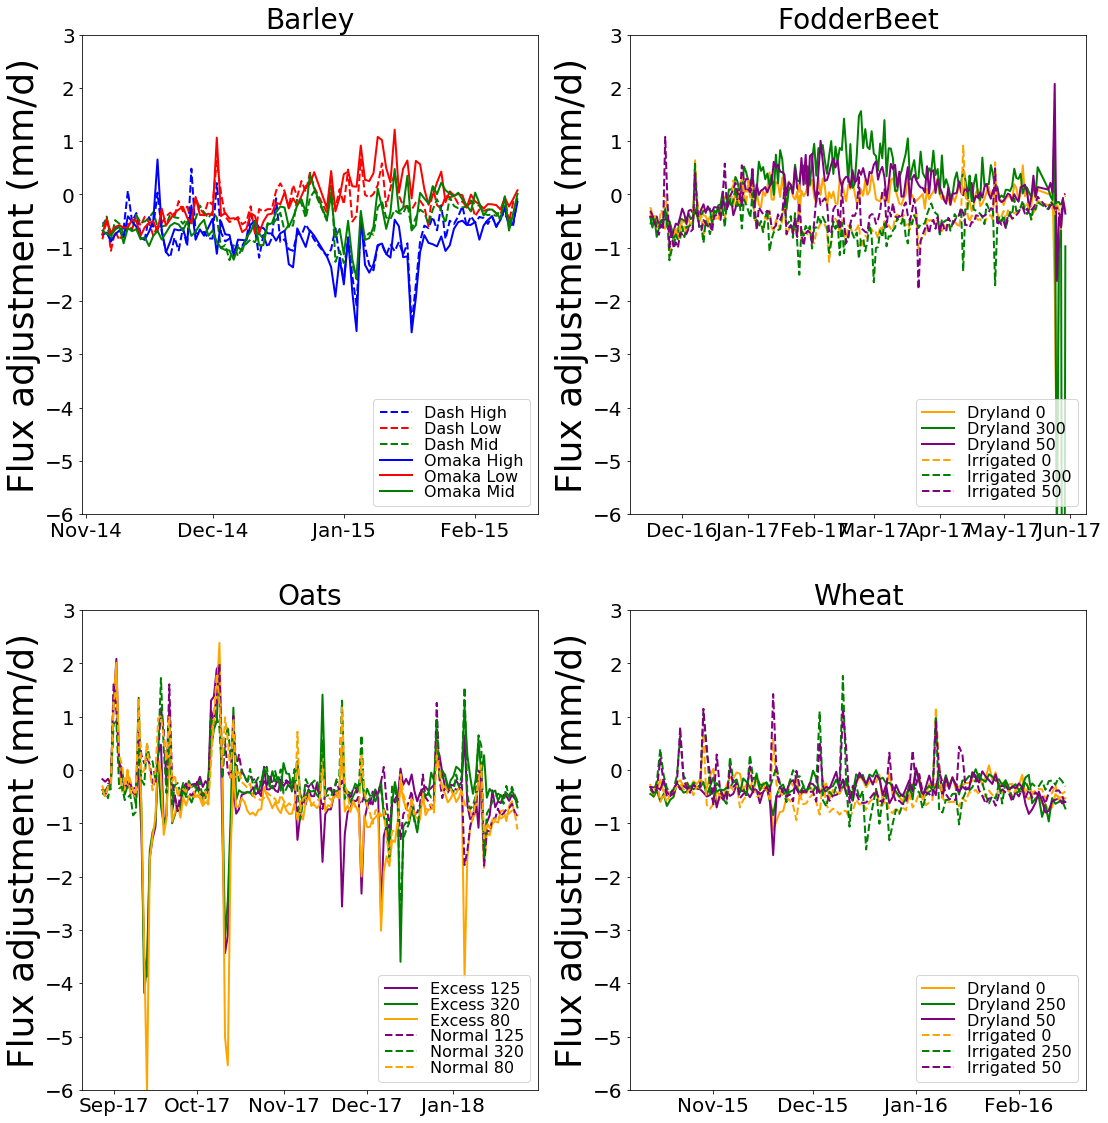

In [44]:
MakeTimeSeriesGraphs(FluxAdjustment,'Flux adjustment (mm/d)',-6,3,4)

In [45]:
DailyET = DailyWaterDelta - FluxAdjustment

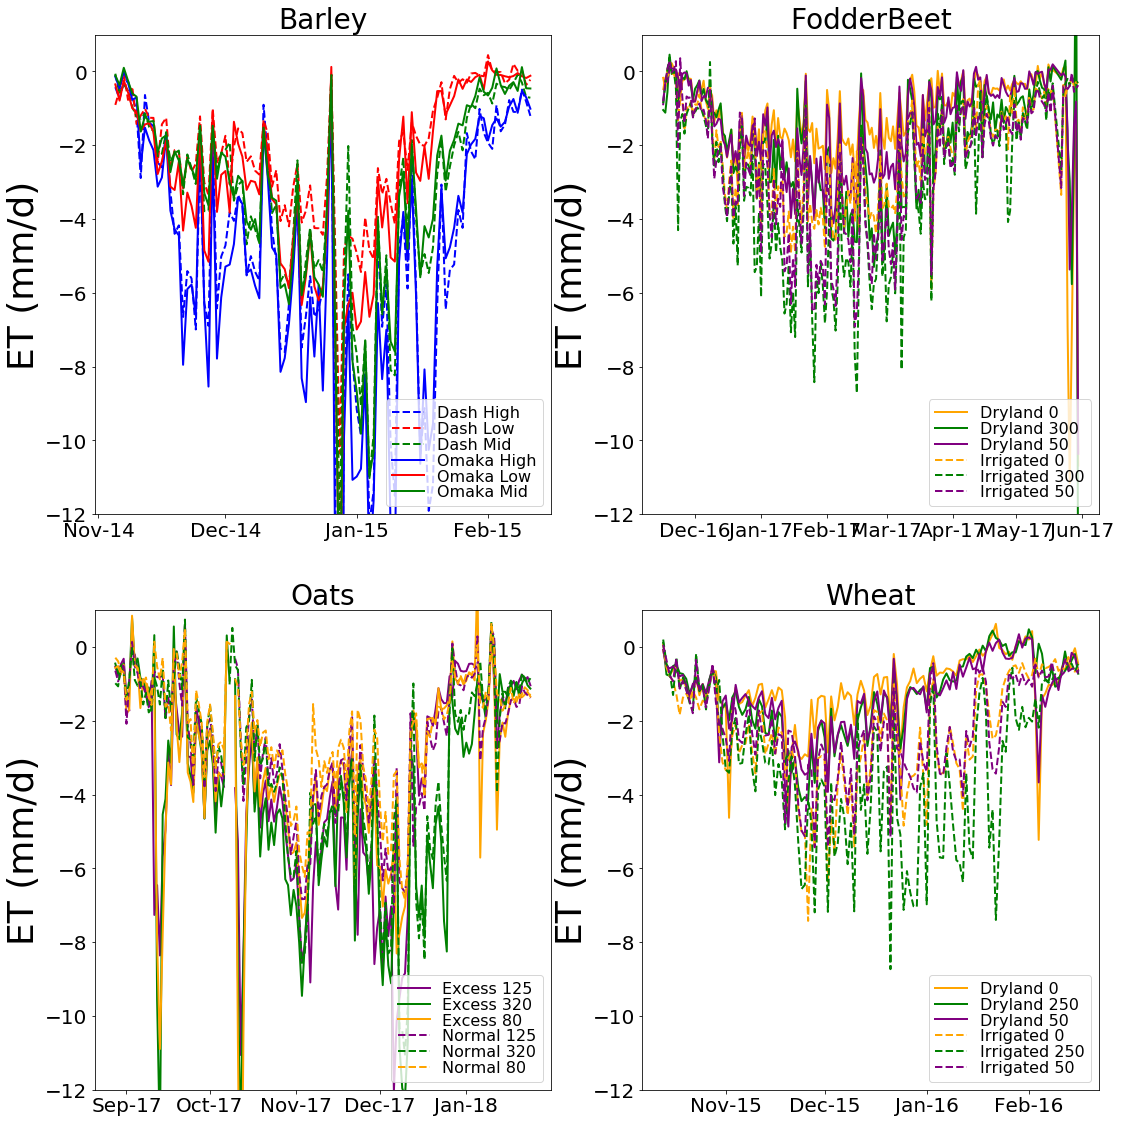

In [46]:
MakeTimeSeriesGraphs(DailyET,'ET (mm/d)',-12,1,4)

In [47]:
DailyET.to_pickle('DailyET.pkl')